In [112]:
from __future__ import print_function, division
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import pickle
import matplotlib.pyplot as plt

#url = 'https://www.basketball-reference.com/leagues/NBA_2017_rookies.html'

#response = requests.get(url)
    


In [29]:
!pip install selenium

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [30]:
import requests
#robots.txt files it's a way for the website to list guidelines for what NOT to webscrape
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [113]:
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver


In [63]:
urlsOfInterest = ["http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2002/seasontype/3", 
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2003/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2004/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2005/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2006/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2007/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2008/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2009/seasontype/3",
                  "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2010/seasontype/3", 
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2011/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2012/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2013/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2014/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2015/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2016/seasontype/3",
                 "http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2017/seasontype/3",
                 ]

driver = webdriver.Chrome(chromedriver)
#driver.get("http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2002/seasontype/3")



In [33]:
content_url_list = []

In [34]:
for urls in urlsOfInterest:
    driver.get(urls)
    for i in range (0, 3):
        content_url = driver.current_url
        content_url_list.append(content_url)
        next_button = driver.find_element_by_class_name("jcarousel-next")
        next_button.click()
    

In [35]:
print(content_url_list)

['http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2002/seasontype/3', 'http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2002/seasontype/3/count/41', 'http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2002/seasontype/3/count/81', 'http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2003/seasontype/3', 'http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2003/seasontype/3/count/41', 'http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2003/seasontype/3/count/81', 'http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scoring-per-game/sort/avgPoints/year/2004/seasontype/3', 'http://www.espn.com/mens-college-basketball/statistics/player/_/stat/scor

#### The below snippet scrapes espn college data using Selenium 

In [71]:
import pandas as pd

# list of dictionaries is a very nice parsing format: pandas
# can automatically convert it to a dataframe
headers = ['Rank','Player', 'Team', 'Games Played', 'Minutes Per Game', 'Points Per Game', 'FGM-FGA', 'FG%', '3PM-3PA',
           '3P%', 'FTM-FTA', 'FT%']
           
# masterListofLists = []
masterListofLists2 = []
big_list = []      
for urls in content_url_list:
    driver.get(urls)
    x = driver.find_elements_by_class_name("oddrow")
    #y = driver.find_elements_by_class_name("evenrow")
    for item in x:
        intermediateList = []
        for i in range (0, 12):
            intermediateList.append(item.find_elements_by_tag_name('td')[i].text)
        big_list.append(intermediateList)


In [76]:
for urls in content_url_list:
    driver.get(urls)
    y = driver.find_elements_by_class_name("evenrow")
    #y = driver.find_elements_by_class_name("evenrow")
    for item in y:
        intermediateList = []
        for i in range (0, 12):
            intermediateList.append(item.find_elements_by_tag_name('td')[i].text)
        big_list.append(intermediateList)

In [77]:
big_list

[['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39.0',
  '33.0',
  '13.0-21.0',
  '.619',
  '3.0-4.0',
  '.750',
  '4.0-4.0',
  '1.000'],
 ['3',
  'Len Matela, C',
  'BGSU',
  '1',
  '38.0',
  '31.0',
  '12.0-16.0',
  '.750',
  '1.0-1.0',
  '1.000',
  '6.0-7.0',
  '.857'],
 ['5',
  'Awvee Storey, G',
  'ASU',
  '1',
  '26.0',
  '29.0',
  '13.0-20.0',
  '.650',
  '0.0-0.0',
  '.000',
  '3.0-4.0',
  '.750'],
 ['7',
  'Jarvis Hayes, G',
  'UGA',
  '2',
  '38.0',
  '28.5',
  '11.0-18.5',
  '.595',
  '3.0-4.0',
  '.750',
  '3.5-4.5',
  '.778'],
 ['9',
  'Troy Bell, G',
  'BC',
  '1',
  '38.0',
  '27.0',
  '10.0-21.0',
  '.476',
  '3.0-8.0',
  '.375',
  '4.0-5.0',
  '.800'],
 ['11',
  'Caron Butler, F',
  'CONN',
  '4',
  '37.3',
  '26.5',
  '8.0-14.5',
  '.552',
  '2.0-4.0',
  '.500',
  '8.5-10.0',
  '.850'],
 [' ',
  'Dan Dickau, G',
  'GONZ',
  '1',
  '39.0',
  '26.0',
  '7.0-24.0',
  '.292',
  '4.0-14.0',
  '.286',
  '8.0-11.0',
  '.727'],
 [' ',
  'Predrag Savovic, G',
  'HAW',
  '1',
  '

In [57]:
masterListofLists

[['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39.0',
  '33.0',
  '13.0-21.0',
  '.619',
  '3.0-4.0',
  '.750',
  '4.0-4.0',
  '1.000'],
 ['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39.0',
  '33.0',
  '13.0-21.0',
  '.619',
  '3.0-4.0',
  '.750',
  '4.0-4.0',
  '1.000'],
 ['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39.0',
  '33.0',
  '13.0-21.0',
  '.619',
  '3.0-4.0',
  '.750',
  '4.0-4.0',
  '1.000'],
 ['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39.0',
  '33.0',
  '13.0-21.0',
  '.619',
  '3.0-4.0',
  '.750',
  '4.0-4.0',
  '1.000'],
 ['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39.0',
  '33.0',
  '13.0-21.0',
  '.619',
  '3.0-4.0',
  '.750',
  '4.0-4.0',
  '1.000'],
 ['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39.0',
  '33.0',
  '13.0-21.0',
  '.619',
  '3.0-4.0',
  '.750',
  '4.0-4.0',
  '1.000'],
 ['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39.0',
  '33.0',
  '13.0-21.0',
  '.619',
  '3.0-4.0',
  '.750',
  '4.0-4.0',
  '1.000'],
 ['1',
  'Luis Flores, G',
  'MAN',
  '1',
  '39

In [44]:
len(masterListofLists)

20880

#### Below code maps the scraped data, currently in list of lists format, and maps it to the headers list, which is list of column names, to create a pandas dataframe

In [78]:
college_df = pd.DataFrame(big_list, columns = headers)

In [79]:
college_df

Rank                   Player  Team Games Played Minutes Per Game  \
0       1           Luis Flores, G   MAN            1             39.0   
1       3            Len Matela, C  BGSU            1             38.0   
2       5          Awvee Storey, G   ASU            1             26.0   
3       7          Jarvis Hayes, G   UGA            2             38.0   
4       9             Troy Bell, G    BC            1             38.0   
5      11          Caron Butler, F  CONN            4             37.3   
6                    Dan Dickau, G  GONZ            1             39.0   
7               Predrag Savovic, G   HAW            1             38.0   
8      17      Preston Shumpert, G   SYR            5             40.8   
9                    Greg Grays, G   DET            1             35.0   
10              Desmond Penigar, F   USU            1             28.0   
11     23       Tayshaun Prince, F    UK            3             37.3   
12                  Louis Kelly, G  UNLV            2             34.0   
13                 Keith McLeod, G  BGSU            1             32.0   
14              Cuthbert Victor, F  MURR            1             39.0   
15     31        Chris Williams, G  BALL            4             33.3   
16             Maurice Williams, G   ALA            2             36.0   
17                Ruben Douglas, G   UNM            1             35.0   
18     37      Travarus Bennett, F  MINN            2             32.0   
19               Dalron Johnson, F  UNLV            2             36.0   
20     41          Raitis Grafs, C  VALP            1             35.0   
21                   Sam Clancy, F   USC            1             45.0   
22               Curtis Millage, G   ASU            1             39.0   
23               Casey Jacobsen, G  STAN            2             35.5   
24             Gerrod Henderson, G    LT            3             35.7   
25                Travis Hansen, G   BYU            2             31.0   
26                Udonis Haslem, C   FLA            1             31.0   
27               Marcus Fleming, F  ALCN            1             36.0   
28     57      Jermaine Dearman, F   SIU            3             28.7   
29                Jameer Nelson, G  JOES            2             35.0   
...   ...                      ...   ...          ...              ...   
1710               Dwayne Bacon, G   FSU            2             34.0   
1711   44       Frank Mason III, G    KU            4             35.5   
1712               Ahmad Thomas, G  UNCA            1             37.0   
1713       Matthew Fisher-Davis, G   VAN            1             31.0   
1714             Cameron Oliver, F   NEV            1             40.0   
1715          Jordan Washington, F  IONA            1             27.0   
1716               Gian Clavell, G   CSU            2             39.0   
1717               De'Aaron Fox, G    UK            4             32.3   
1718                 Kyle Kuzma, F  UTAH            1             37.0   
1719   60         Grayson Allen, G  DUKE            2             30.5   
1720              Miles Bridges, G   MSU            2             34.5   
1721           Josh Cuthbertson, F  UPST            1             31.0   
1722            Drick Bernstine, F   UND            1             38.0   
1723               Kerem Kanter, F    GB            1             18.0   
1724               Matija Milin, F  FAIR            1             37.0   
1725   72           Josh Okogie, G    GT            5             35.6   
1726              Deonte Burton, G   ISU            2             34.0   
1727   76        Bronson Koenig, G   WIS            3             35.0   
1728              Chimezie Metu, F   USC            3             33.0   
1729               Chima Moneke, F   UCD            2             30.0   
1730             Damyean Dotson, G   HOU            1             35.0   
1731             Diante Baldwin, G  UNCG            1             38.0   
1732     

In [80]:
new_df= college_df.groupby(["Player"])

In [ ]:
new_df.head(50)

In [81]:
new_college_postseason_df = college_df






In [82]:
new_college_postseason_df


Rank                   Player  Team Games Played Minutes Per Game  \
0       1           Luis Flores, G   MAN            1             39.0   
1       3            Len Matela, C  BGSU            1             38.0   
2       5          Awvee Storey, G   ASU            1             26.0   
3       7          Jarvis Hayes, G   UGA            2             38.0   
4       9             Troy Bell, G    BC            1             38.0   
5      11          Caron Butler, F  CONN            4             37.3   
6                    Dan Dickau, G  GONZ            1             39.0   
7               Predrag Savovic, G   HAW            1             38.0   
8      17      Preston Shumpert, G   SYR            5             40.8   
9                    Greg Grays, G   DET            1             35.0   
10              Desmond Penigar, F   USU            1             28.0   
11     23       Tayshaun Prince, F    UK            3             37.3   
12                  Louis Kelly, G  UNLV            2             34.0   
13                 Keith McLeod, G  BGSU            1             32.0   
14              Cuthbert Victor, F  MURR            1             39.0   
15     31        Chris Williams, G  BALL            4             33.3   
16             Maurice Williams, G   ALA            2             36.0   
17                Ruben Douglas, G   UNM            1             35.0   
18     37      Travarus Bennett, F  MINN            2             32.0   
19               Dalron Johnson, F  UNLV            2             36.0   
20     41          Raitis Grafs, C  VALP            1             35.0   
21                   Sam Clancy, F   USC            1             45.0   
22               Curtis Millage, G   ASU            1             39.0   
23               Casey Jacobsen, G  STAN            2             35.5   
24             Gerrod Henderson, G    LT            3             35.7   
25                Travis Hansen, G   BYU            2             31.0   
26                Udonis Haslem, C   FLA            1             31.0   
27               Marcus Fleming, F  ALCN            1             36.0   
28     57      Jermaine Dearman, F   SIU            3             28.7   
29                Jameer Nelson, G  JOES            2             35.0   
...   ...                      ...   ...          ...              ...   
1710               Dwayne Bacon, G   FSU            2             34.0   
1711   44       Frank Mason III, G    KU            4             35.5   
1712               Ahmad Thomas, G  UNCA            1             37.0   
1713       Matthew Fisher-Davis, G   VAN            1             31.0   
1714             Cameron Oliver, F   NEV            1             40.0   
1715          Jordan Washington, F  IONA            1             27.0   
1716               Gian Clavell, G   CSU            2             39.0   
1717               De'Aaron Fox, G    UK            4             32.3   
1718                 Kyle Kuzma, F  UTAH            1             37.0   
1719   60         Grayson Allen, G  DUKE            2             30.5   
1720              Miles Bridges, G   MSU            2             34.5   
1721           Josh Cuthbertson, F  UPST            1             31.0   
1722            Drick Bernstine, F   UND            1             38.0   
1723               Kerem Kanter, F    GB            1             18.0   
1724               Matija Milin, F  FAIR            1             37.0   
1725   72           Josh Okogie, G    GT            5             35.6   
1726              Deonte Burton, G   ISU            2             34.0   
1727   76        Bronson Koenig, G   WIS            3             35.0   
1728              Chimezie Metu, F   USC            3             33.0   
1729               Chima Moneke, F   UCD            2             30.0   
1730             Damyean Dotson, G   HOU            1             35.0   
1731             Diante Baldwin, G  UNCG            1             38.0   
1732     

In [18]:
nba_year_list = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

#### Below snippet uses Selenium to scrape NBA rookie data from the years listed in the list above 

In [19]:
driver = webdriver.Chrome(chromedriver)
nba_list_of_lists= []
for year in nba_year_list:
    current_url = "https://www.basketball-reference.com/leagues/NBA_{}_rookies.html".format(year)
    driver.get(current_url)
    full_table = driver.find_elements_by_class_name('full_table')
    for i in range(0, len(full_table)):
        intermediateList = []
        for j in range (0, 26):
            intermediateList.append(full_table[i].find_elements_by_tag_name("td")[j].text)
            nba_list_of_lists.append(intermediateList)
        
        
    


In [20]:
nba_list_of_lists

[['Malik Allen',
  '23',
  '10',
  '478',
  '7262',
  '1039',
  '2365',
  '3',
  '16',
  '253',
  '325',
  '466',
  '1353',
  '228',
  '130',
  '220',
  '320',
  '897',
  '2334',
  '.439',
  '.188',
  '.778',
  '15.2',
  '4.9',
  '2.8',
  '0.5'],
 ['Malik Allen',
  '23',
  '10',
  '478',
  '7262',
  '1039',
  '2365',
  '3',
  '16',
  '253',
  '325',
  '466',
  '1353',
  '228',
  '130',
  '220',
  '320',
  '897',
  '2334',
  '.439',
  '.188',
  '.778',
  '15.2',
  '4.9',
  '2.8',
  '0.5'],
 ['Malik Allen',
  '23',
  '10',
  '478',
  '7262',
  '1039',
  '2365',
  '3',
  '16',
  '253',
  '325',
  '466',
  '1353',
  '228',
  '130',
  '220',
  '320',
  '897',
  '2334',
  '.439',
  '.188',
  '.778',
  '15.2',
  '4.9',
  '2.8',
  '0.5'],
 ['Malik Allen',
  '23',
  '10',
  '478',
  '7262',
  '1039',
  '2365',
  '3',
  '16',
  '253',
  '325',
  '466',
  '1353',
  '228',
  '130',
  '220',
  '320',
  '897',
  '2334',
  '.439',
  '.188',
  '.778',
  '15.2',
  '4.9',
  '2.8',
  '0.5'],
 ['Malik All

In [21]:
#headers = ['Rank','Player', 'Team', 'Games Played', 'Minutes Per Game', 'Points Per Game', 'FGM-FGA', 'FG%', '3PM-3PA',
           #'3P%', 'FTM-FTA', 'FT%']
nba_headers = ['Player', 'Age', 'Years Played', 'Games Played', 'Minutes Played', 'Field Goals' , 'Field Goal Attempts',
          '3 pt Field Goals', '3 pt Attempts', 'Free Throws', 'Free Throw Attempts', 'Offensive Rebounds', 'Total Rebounds'
          , 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points', 'FG%', '3P%', 'FT%', 'Minutes Played Per Game',
          'Points Per Game', 'Total Rebounds per game', 'Assists per game']
#len(nba_headers)
nba_rookie_df = pd.DataFrame(nba_list_of_lists, columns = nba_headers)

In [89]:
nba_rookie_df

Player Age Years Played Games Played Minutes Played  \
0                Malik Allen  23           10          478           7262   
26            Chris Andersen  23           15          695          12273   
52            Gilbert Arenas  20           11          552          19351   
78         Brandon Armstrong  21            3          108            699   
104            Carlos Arroyo  22            9          569          10651   
130            Mengke Bateer  26            3           46            494   
156            Shane Battier  23           13          977          30004   
182             Charlie Bell  22            7          376           9368   
208    Ruben Boumtje-Boumtje  23            3           44            276   
234          Michael Bradley  22            5          173           2016   
260           Jamison Brewer  21            4           54            468   
286            Primoz Brezec  22            8          342           6192   
312             Damone Brown  22            4           39            351   
338             Ernest Brown  22            1            3             21   
364            Kedrick Brown  20            4          143           1935   
390              Kwame Brown  19           12          607          13389   
416             Tierre Brown  22            4          134           1654   
442           Tyson Chandler  19           17         1079          30523   
468           Speedy Claxton  23            7          334           8548   
494           Jarron Collins  23           10          542           8542   
520            Jason Collins  23           13          735          14974   
546              Joe Crispin  22            1           21            156   
572               Eddy Curry  19           11          527          13109   
598         Samuel Dalembert  20           13          886          21646   
624            DeSagana Diop  20           12          601           8403   
650         Predrag Drobnjak  26            4          278           5542   
676            Maurice Evans  23            9          562          10918   
702           Isaac Fontaine  26            1            6             75   
728               Alton Ford  20            3           73            524   
754             Joseph Forte  20            2           25            125   
...                      ...  ..          ...          ...            ...   
29536          Daniel Ochefu  23            1           19             75   
29562         Chinanu Onuaku  20            2            6             74   
29588   Georgios Papagiannis  19            2           39            477   
29614            Gary Payton  24            2           29            320   
29640       Marshall Plumlee  24            2           29            222   
29666           Jakob Poeltl  21            2          136           2150   
29692         Alex Poythress  23            2           31            261   
29718         Tim Quarterman  22            2           19             93   
29744         Chasson Randle  23            1           26            299   
29770     Malachi Richardson  21            2           48            522   
29796       Domantas Sabonis  20            2          155           3442   
29822            Dario Saric  22            2          159           4439   
29848       Tomas Satoransky  25            2          130           2362   
29874           Wayne Selden  22            2           49            928   
29900          Pascal Siakam  22            2          136           2538   
29926          Diamond Stone  19            1            7             24   
29952          Isaiah Taylor  22            2           71           1219   
29978             Mike Tobey  22            1            2             25   
30004             Tyler Ulis  21            2          132           2781   
30030          Jarrod Uthoff  23            1            9            115   
30056       Denzel

In [23]:
nba_rookie_df = nba_rookie_df.drop_duplicates(["Player"], keep='first')

In [91]:
nba_rookie_df.columns

Index(['Player', 'Age', 'Years Played', 'Games Played', 'Minutes Played',
       'Field Goals', 'Field Goal Attempts', '3 pt Field Goals',
       '3 pt Attempts', 'Free Throws', 'Free Throw Attempts',
       'Offensive Rebounds', 'Total Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points', 'FG%', '3P%', 'FT%',
       'Minutes Played Per Game', 'Points Per Game', 'Total Rebounds per game',
       'Assists per game'],
      dtype='object')

In [94]:
df_corr = nba_rookie_df[["Minutes Played Per Game", "Points Per Game"]]

In [101]:
df_corr[['Minutes Played Per Game', 'Points Per Game']] = df_corr[['Minutes Played Per Game', 'Points Per Game']].apply(pd.to_numeric)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [102]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 30290
Data columns (total 2 columns):
Minutes Played Per Game    1162 non-null float64
Points Per Game            1162 non-null float64
dtypes: float64(2)
memory usage: 27.2 KB


In [103]:
df_corr['Minutes Played Per Game'].corr(df_corr['Points Per Game'])

0.9211050233014061

#### Scatterplot below showing relationship between minutes played in the NBA vs points scored in the NBA by ROOKIES only

Text(0,0.5,'Points Scored In NBA')

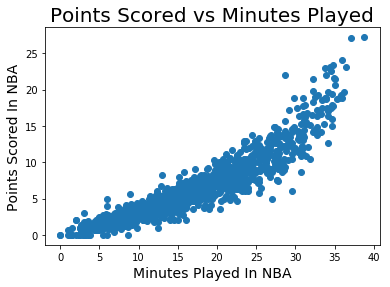

In [150]:
plt.scatter(x=df_corr['Minutes Played Per Game'], y = df_corr['Points Per Game'])
plt.title("Points Scored vs Minutes Played", fontsize=20)
plt.xlabel("Minutes Played In NBA", fontsize=14)
plt.ylabel("Points per game In NBA", fontsize=14)

In [25]:
nba_rookie_df

Player Age Years Played Games Played Minutes Played  \
0                Malik Allen  23           10          478           7262   
26            Chris Andersen  23           15          695          12273   
52            Gilbert Arenas  20           11          552          19351   
78         Brandon Armstrong  21            3          108            699   
104            Carlos Arroyo  22            9          569          10651   
130            Mengke Bateer  26            3           46            494   
156            Shane Battier  23           13          977          30004   
182             Charlie Bell  22            7          376           9368   
208    Ruben Boumtje-Boumtje  23            3           44            276   
234          Michael Bradley  22            5          173           2016   
260           Jamison Brewer  21            4           54            468   
286            Primoz Brezec  22            8          342           6192   
312             Damone Brown  22            4           39            351   
338             Ernest Brown  22            1            3             21   
364            Kedrick Brown  20            4          143           1935   
390              Kwame Brown  19           12          607          13389   
416             Tierre Brown  22            4          134           1654   
442           Tyson Chandler  19           17         1079          30523   
468           Speedy Claxton  23            7          334           8548   
494           Jarron Collins  23           10          542           8542   
520            Jason Collins  23           13          735          14974   
546              Joe Crispin  22            1           21            156   
572               Eddy Curry  19           11          527          13109   
598         Samuel Dalembert  20           13          886          21646   
624            DeSagana Diop  20           12          601           8403   
650         Predrag Drobnjak  26            4          278           5542   
676            Maurice Evans  23            9          562          10918   
702           Isaac Fontaine  26            1            6             75   
728               Alton Ford  20            3           73            524   
754             Joseph Forte  20            2           25            125   
...                      ...  ..          ...          ...            ...   
29536          Daniel Ochefu  23            1           19             75   
29562         Chinanu Onuaku  20            2            6             74   
29588   Georgios Papagiannis  19            2           39            477   
29614            Gary Payton  24            2           29            320   
29640       Marshall Plumlee  24            2           29            222   
29666           Jakob Poeltl  21            2          136           2150   
29692         Alex Poythress  23            2           31            261   
29718         Tim Quarterman  22            2           19             93   
29744         Chasson Randle  23            1           26            299   
29770     Malachi Richardson  21            2           48            522   
29796       Domantas Sabonis  20            2          155           3442   
29822            Dario Saric  22            2          159           4439   
29848       Tomas Satoransky  25            2          130           2362   
29874           Wayne Selden  22            2           49            928   
29900          Pascal Siakam  22            2          136           2538   
29926          Diamond Stone  19            1            7             24   
29952          Isaiah Taylor  22            2           71           1219   
29978             Mike Tobey  22            1            2             25   
30004             Tyler Ulis  21            2          132           2781   
30030          Jarrod Uthoff  23            1            9            115   
30056       Denzel

In [27]:
with open('nba_rookie_df.pkl', 'wb') as picklefile:
    pickle.dump(nba_rookie_df, picklefile)

In [83]:
with open('new_college_postseason_df.pkl', 'wb') as picklefile:
    pickle.dump(new_college_postseason_df, picklefile)

In [84]:
new_college_postseason_df

Rank                   Player  Team Games Played Minutes Per Game  \
0       1           Luis Flores, G   MAN            1             39.0   
1       3            Len Matela, C  BGSU            1             38.0   
2       5          Awvee Storey, G   ASU            1             26.0   
3       7          Jarvis Hayes, G   UGA            2             38.0   
4       9             Troy Bell, G    BC            1             38.0   
5      11          Caron Butler, F  CONN            4             37.3   
6                    Dan Dickau, G  GONZ            1             39.0   
7               Predrag Savovic, G   HAW            1             38.0   
8      17      Preston Shumpert, G   SYR            5             40.8   
9                    Greg Grays, G   DET            1             35.0   
10              Desmond Penigar, F   USU            1             28.0   
11     23       Tayshaun Prince, F    UK            3             37.3   
12                  Louis Kelly, G  UNLV            2             34.0   
13                 Keith McLeod, G  BGSU            1             32.0   
14              Cuthbert Victor, F  MURR            1             39.0   
15     31        Chris Williams, G  BALL            4             33.3   
16             Maurice Williams, G   ALA            2             36.0   
17                Ruben Douglas, G   UNM            1             35.0   
18     37      Travarus Bennett, F  MINN            2             32.0   
19               Dalron Johnson, F  UNLV            2             36.0   
20     41          Raitis Grafs, C  VALP            1             35.0   
21                   Sam Clancy, F   USC            1             45.0   
22               Curtis Millage, G   ASU            1             39.0   
23               Casey Jacobsen, G  STAN            2             35.5   
24             Gerrod Henderson, G    LT            3             35.7   
25                Travis Hansen, G   BYU            2             31.0   
26                Udonis Haslem, C   FLA            1             31.0   
27               Marcus Fleming, F  ALCN            1             36.0   
28     57      Jermaine Dearman, F   SIU            3             28.7   
29                Jameer Nelson, G  JOES            2             35.0   
...   ...                      ...   ...          ...              ...   
1710               Dwayne Bacon, G   FSU            2             34.0   
1711   44       Frank Mason III, G    KU            4             35.5   
1712               Ahmad Thomas, G  UNCA            1             37.0   
1713       Matthew Fisher-Davis, G   VAN            1             31.0   
1714             Cameron Oliver, F   NEV            1             40.0   
1715          Jordan Washington, F  IONA            1             27.0   
1716               Gian Clavell, G   CSU            2             39.0   
1717               De'Aaron Fox, G    UK            4             32.3   
1718                 Kyle Kuzma, F  UTAH            1             37.0   
1719   60         Grayson Allen, G  DUKE            2             30.5   
1720              Miles Bridges, G   MSU            2             34.5   
1721           Josh Cuthbertson, F  UPST            1             31.0   
1722            Drick Bernstine, F   UND            1             38.0   
1723               Kerem Kanter, F    GB            1             18.0   
1724               Matija Milin, F  FAIR            1             37.0   
1725   72           Josh Okogie, G    GT            5             35.6   
1726              Deonte Burton, G   ISU            2             34.0   
1727   76        Bronson Koenig, G   WIS            3             35.0   
1728              Chimezie Metu, F   USC            3             33.0   
1729               Chima Moneke, F   UCD            2             30.0   
1730             Damyean Dotson, G   HOU            1             35.0   
1731             Diante Baldwin, G  UNCG            1             38.0   
1732     

In [85]:
nba_rookie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 30290
Data columns (total 26 columns):
Player                     1162 non-null object
Age                        1162 non-null object
Years Played               1162 non-null object
Games Played               1162 non-null object
Minutes Played             1162 non-null object
Field Goals                1162 non-null object
Field Goal Attempts        1162 non-null object
3 pt Field Goals           1162 non-null object
3 pt Attempts              1162 non-null object
Free Throws                1162 non-null object
Free Throw Attempts        1162 non-null object
Offensive Rebounds         1162 non-null object
Total Rebounds             1162 non-null object
Assists                    1162 non-null object
Steals                     1162 non-null object
Blocks                     1162 non-null object
Turnovers                  1162 non-null object
Personal Fouls             1162 non-null object
Points                     1